In [1]:
import pandas as pd
import numpy as np


## Data preprocessing
 It includes the adds the names to the columns and separate the data by using the title

In [2]:
train_data=pd.read_csv("train_data.txt",sep=':::',names=['sr.no','title','Genre','Description'],  engine='python')

In [3]:
# now we are going to use only the description for predicting the genre 
#then we does not require the column named title and sr.no
train_data.drop(columns=['title','sr.no'],inplace=True)


In [4]:
train_data.head()

,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


In [5]:
test_data=pd.read_csv("test_data.txt",sep=':::',names=['sr.no','title','Description'],  engine='python')

In [6]:
test_data.drop(columns=['sr.no','title'],inplace=True)

In [7]:
test_data.head()

,Description
0,"L.R. Brane loves his life - his car, his apar..."
1,"Spain, March 1964: Quico is a very naughty ch..."
2,One year in the life of Albin and his family ...
3,"His father has died, he hasn't spoken with hi..."
4,Before he was known internationally as a mart...


In [8]:
test_data.shape

(54200, 1)

In [9]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['sr.no', 'title', 'Genre', 'Description'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13712\4164088001.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['sr.no', 'title', 'Genre', 'Description'])


,sr.no,title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


In [10]:
test_solution_data.drop(columns=['title','sr.no'],inplace=True)

In [11]:
test_solution_data.shape

(54200, 2)

In [12]:
test_solution_data.head()

,Genre,Description
0,thriller,"L.R. Brane loves his life - his car, his apar..."
1,comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,documentary,One year in the life of Albin and his family ...
3,drama,"His father has died, he hasn't spoken with hi..."
4,drama,Before he was known internationally as a mart...


## Data Analysis 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

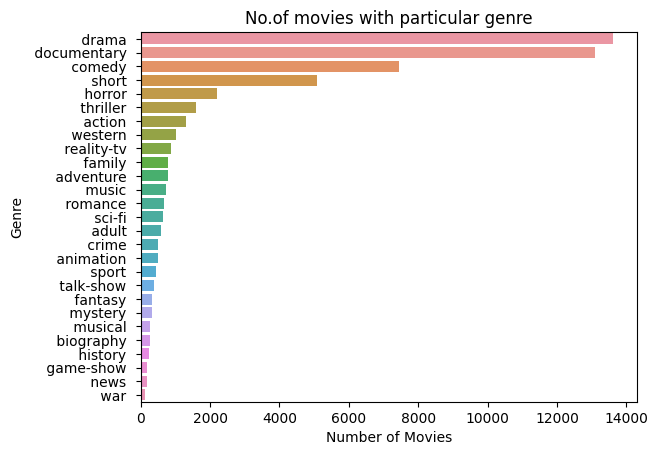

In [14]:
sns.countplot(y=train_data['Genre'], order = train_data['Genre'].value_counts().index)
plt.title('No.of movies with particular genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

## top 10 genre 

In [15]:
top_genres = train_data['Genre'].value_counts().head(10)

In [16]:
top_genres

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
Name: count, dtype: int64

In [17]:
#plotting the graph for top 10 Genres

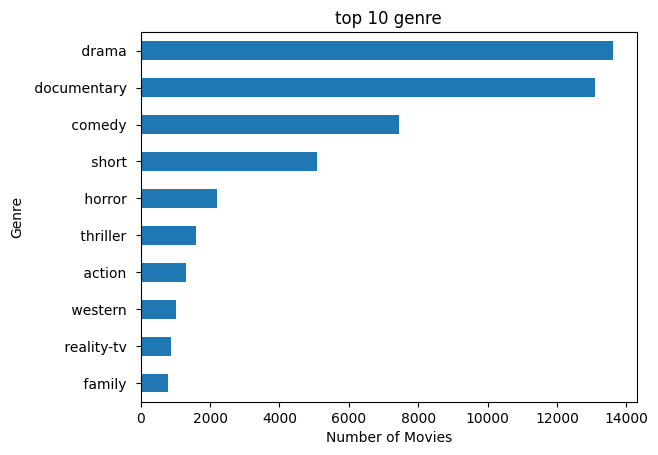

In [18]:

top_genres.plot(kind='barh')
plt.title('top 10 genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

In [19]:
train_data.head()

,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


In [20]:
test_solution_data.head()

,Genre,Description
0,thriller,"L.R. Brane loves his life - his car, his apar..."
1,comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,documentary,One year in the life of Albin and his family ...
3,drama,"His father has died, he hasn't spoken with hi..."
4,drama,Before he was known internationally as a mart...


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
# train_data['Genre']=encoder.fit_transform(train_data['Genre'])

In [23]:
train_data.head()

,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


In [24]:
# test_solution_data['Genre']=encoder.fit_transform(test_solution_data['Genre'])

In [25]:
test_solution_data.head()

,Genre,Description
0,thriller,"L.R. Brane loves his life - his car, his apar..."
1,comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,documentary,One year in the life of Albin and his family ...
3,drama,"His father has died, he hasn't spoken with hi..."
4,drama,Before he was known internationally as a mart...


## Training phase

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the English stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
train_data['Description'].fillna("", inplace=True)
test_solution_data['Description'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['Description'])
X_test = t_v.transform(test_solution_data['Description'])


y_train = encoder.fit_transform(train_data['Genre'])
y_test = encoder.transform(test_solution_data['Genre'])

In [28]:
print(X_train.shape)


(54214, 100000)


now we are applying the algorithms to train the module to prsict the genre based on the description

In [29]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Spliting the Data 

In [64]:
# Linear SVC

In [30]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)


C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [31]:
print(X_val.shape)
print(y_val.shape)
print(X_train_sub.shape)
print(y_train_sub.shape)

(10843, 100000)
(10843,)
(43371, 100000)
(43371,)


In [32]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5793173431734318
Test Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.32      0.37      1314
           1       0.64      0.38      0.48       590
           2       0.51      0.23      0.31       775
           3       0.45      0.14      0.21       498
           4       0.00      0.00      0.00       264
           5       0.53      0.58      0.56      7446
           6       0.30      0.07      0.11       505
           7       0.68      0.82      0.75     13096
           8       0.56      0.71      0.63     13612
           9       0.36      0.14      0.21       783
          10       0.26      0.06      0.09       322
          11       0.80      0.62      0.70       193
          12       0.28      0.02      0.04       243
          13       0.60      0.62      0.61      2204
          14       0.62      0.52      0.56       731
          15       0.37      0.08      0.13       276
          16      

In [33]:
y_pred = clf.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_pred))
print("Test Classification Report:\n", classification_report(y_val, y_pred))

Test Accuracy: 0.5836945494789265
Test Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
          16      

In [34]:
clf.fit(X_train, y_train)

C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [35]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5859040590405904
Test Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.34      0.37      1314
           1       0.65      0.42      0.51       590
           2       0.51      0.22      0.31       775
           3       0.41      0.13      0.19       498
           4       0.00      0.00      0.00       264
           5       0.55      0.58      0.56      7446
           6       0.27      0.06      0.10       505
           7       0.69      0.83      0.75     13096
           8       0.56      0.72      0.63     13612
           9       0.38      0.15      0.22       783
          10       0.31      0.07      0.12       322
          11       0.81      0.63      0.71       193
          12       0.21      0.02      0.03       243
          13       0.61      0.64      0.63      2204
          14       0.64      0.54      0.59       731
          15       0.36      0.08      0.13       276
          16      

## Multinomial Naive Based classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train_sub, y_train_sub)

MultinomialNB()

In [37]:
y_val_pred=Mnb_classifier.predict(X_val)

In [38]:
y_pred = Mnb_classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.44439114391143913
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.71      0.05      0.09      7446
           6       0.00      0.00      0.00       505
           7       0.53      0.90      0.66     13096
           8       0.38      0.88      0.53     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [39]:
y_pred = Mnb_classifier.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_pred))

Test Accuracy: 0.4465553813520243


##  LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [42]:
y_pred= lr_classifier.predict(X_test)

In [43]:
y_pred = lr_classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5880811808118082
Test Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.26      0.35      1314
           1       0.62      0.20      0.31       590
           2       0.69      0.14      0.24       775
           3       0.57      0.02      0.05       498
           4       0.00      0.00      0.00       264
           5       0.55      0.59      0.57      7446
           6       0.40      0.02      0.04       505
           7       0.66      0.87      0.75     13096
           8       0.54      0.80      0.64     13612
           9       0.59      0.08      0.14       783
          10       0.62      0.02      0.03       322
          11       0.93      0.48      0.63       193
          12       0.00      0.00      0.00       243
          13       0.66      0.57      0.61      2204
          14       0.70      0.40      0.51       731
          15       0.67      0.01      0.01       276
          16      

C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()

bnb = BernoulliNB()

## bernoulli naivebayes classification

In [47]:
bnb.fit(X_train_sub, y_train_sub)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.4951476014760148


## SVC

In [48]:
from sklearn.svm import SVC

In [49]:
svm_classifier = SVC(kernel='rbf', random_state=42)

In [53]:
svm_classifier.fit(X_train_sub, y_train_sub)

SVC(random_state=42)

In [54]:
y_val_pred = svm_classifier.predict(X_val)

In [55]:
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.5678317808724522


using Random forest classifier 

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the subset of the training data
rf_classifier.fit(X_train_sub, y_train_sub)

# Predict labels for the validation set
y_val_pred_rf = rf_classifier.predict(X_val)

# Evaluate the model
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Random Forest Validation Classification Report:\n", classification_report(y_val, y_val_pred_rf))


Random Forest Validation Accuracy: 0.49073134741307756
Random Forest Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       1.00      0.12      0.21       112
           2       0.71      0.09      0.15       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.54      0.27      0.36      1443
           6       1.00      0.01      0.02       107
           7       0.55      0.89      0.68      2659
           8       0.42      0.84      0.56      2697
           9       1.00      0.03      0.05       150
          10       0.00      0.00      0.00        74
          11       1.00      0.25      0.40        40
          12       0.00      0.00      0.00        45
          13       0.67      0.13      0.22       431
          14       0.81      0.12      0.21       144
          15       0.00      0.

C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## different algorithms with accuracy1)
linear svc max accuracy = 58.5%
2) LogisticRegression =58.8 
3) multinomial naive bayes classifier = 44%
4) bernoulli naive bayes classifier = 49
6) SVC =57%
7) Random Forest = 49% %

## saving our model

In [63]:
import pickle
pickle.dump(t_v,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))
pickle.dump(encoder,open('label_encoder.pkl','wb'))


## checking the output is correct or not 

In [61]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return encoder.inverse_transform(pred_label)[0]

desc1 = "Ann Wharton, a rambunctious young student at the prestigious Bredwell Academy, is in trouble after a spoonful of cereal she flung at a classmate hits Mrs. Bredwell in the face. As she is being reprimanded in Mrs. Bredwell's office, a misunderstanding results in a member of the football team arriving at the office with Ann's clothes--she had left them behind when she changed into a football uniform so she could play football with the team--and Mrs. Bredwell writes to Ann's father notifying him that Ann is being expelled. She intercepts the letter, but her troubles are far from over."
print(predict_movie(desc1))

desc2 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(desc2))

 comedy 
 drama 


## done !!
